In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model, tree, ensemble
import umap
import hdbscan
import math

C:\Users\Alberico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = pd.read_csv("data_tg_dupl_rem.csv")

In [3]:
dataset

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,Tg
0,0.000000,0.0,0.0,0.631579,0.000000,0.000000,0.035088,0.245614,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,951.15
1,0.000000,0.0,0.0,0.627119,0.000000,0.000000,0.067797,0.220339,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,966.15
2,0.000000,0.0,0.0,0.622951,0.000000,0.000000,0.098361,0.196721,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,983.15
3,0.000000,0.0,0.0,0.619048,0.000000,0.000000,0.126984,0.174603,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1012.15
4,0.000000,0.0,0.0,0.589063,0.134375,0.000000,0.062500,0.214062,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,898.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43636,0.000000,0.0,0.0,0.666667,0.000000,0.055556,0.000000,0.000000,0.222222,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,798.65
43637,0.125000,0.0,0.0,0.625000,0.000000,0.000000,0.000000,0.000000,0.208333,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,610.65
43638,0.190476,0.0,0.0,0.619048,0.000000,0.000000,0.000000,0.000000,0.095238,0.0,...,0.0,0.0,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,709.15
43639,0.000000,0.0,0.0,0.600000,0.000000,0.000000,0.000000,0.266667,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,767.15


In [49]:
X = dataset.iloc[:,0:-2].values
y = dataset.iloc[:,-1].values
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')
print(X.shape)
print(y.shape)

Matrix of features
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.32599942 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
--------------------------------------------------
Target Variable
[951.15 966.15 983.15 ... 709.15 767.15 768.15]
(43641, 64)
(43641,)


In [5]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [6]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f" Train: index={train_index}")
    print(f" Test: index={test_index}")

Fold 0:
 Train: index=[ 4365  4366  4367 ... 43638 43639 43640]
 Test: index=[   0    1    2 ... 4362 4363 4364]
Fold 1:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[4365 4366 4367 ... 8726 8727 8728]
Fold 2:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[ 8729  8730  8731 ... 13090 13091 13092]
Fold 3:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[13093 13094 13095 ... 17454 17455 17456]
Fold 4:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[17457 17458 17459 ... 21818 21819 21820]
Fold 5:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[21821 21822 21823 ... 26182 26183 26184]
Fold 6:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[26185 26186 26187 ... 30546 30547 30548]
Fold 7:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[30549 30550 30551 ... 34910 34911 34912]
Fold 8:
 Train: index=[    0     1     2 ... 43638 43639 436

# Análise para min_cluster_size = 160 

Fold 1:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[4365 4366 4367 ... 8726 8727 8728]
----------------------------------
Aplicando o MinMaxScaler nos dados
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.1904762 0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
----------------------------------
Aplicando o redutor de dimensionalidade UMAP nos dados
(39277, 10)
----------------------------------
Aplicando o HDBSCAN nos dados


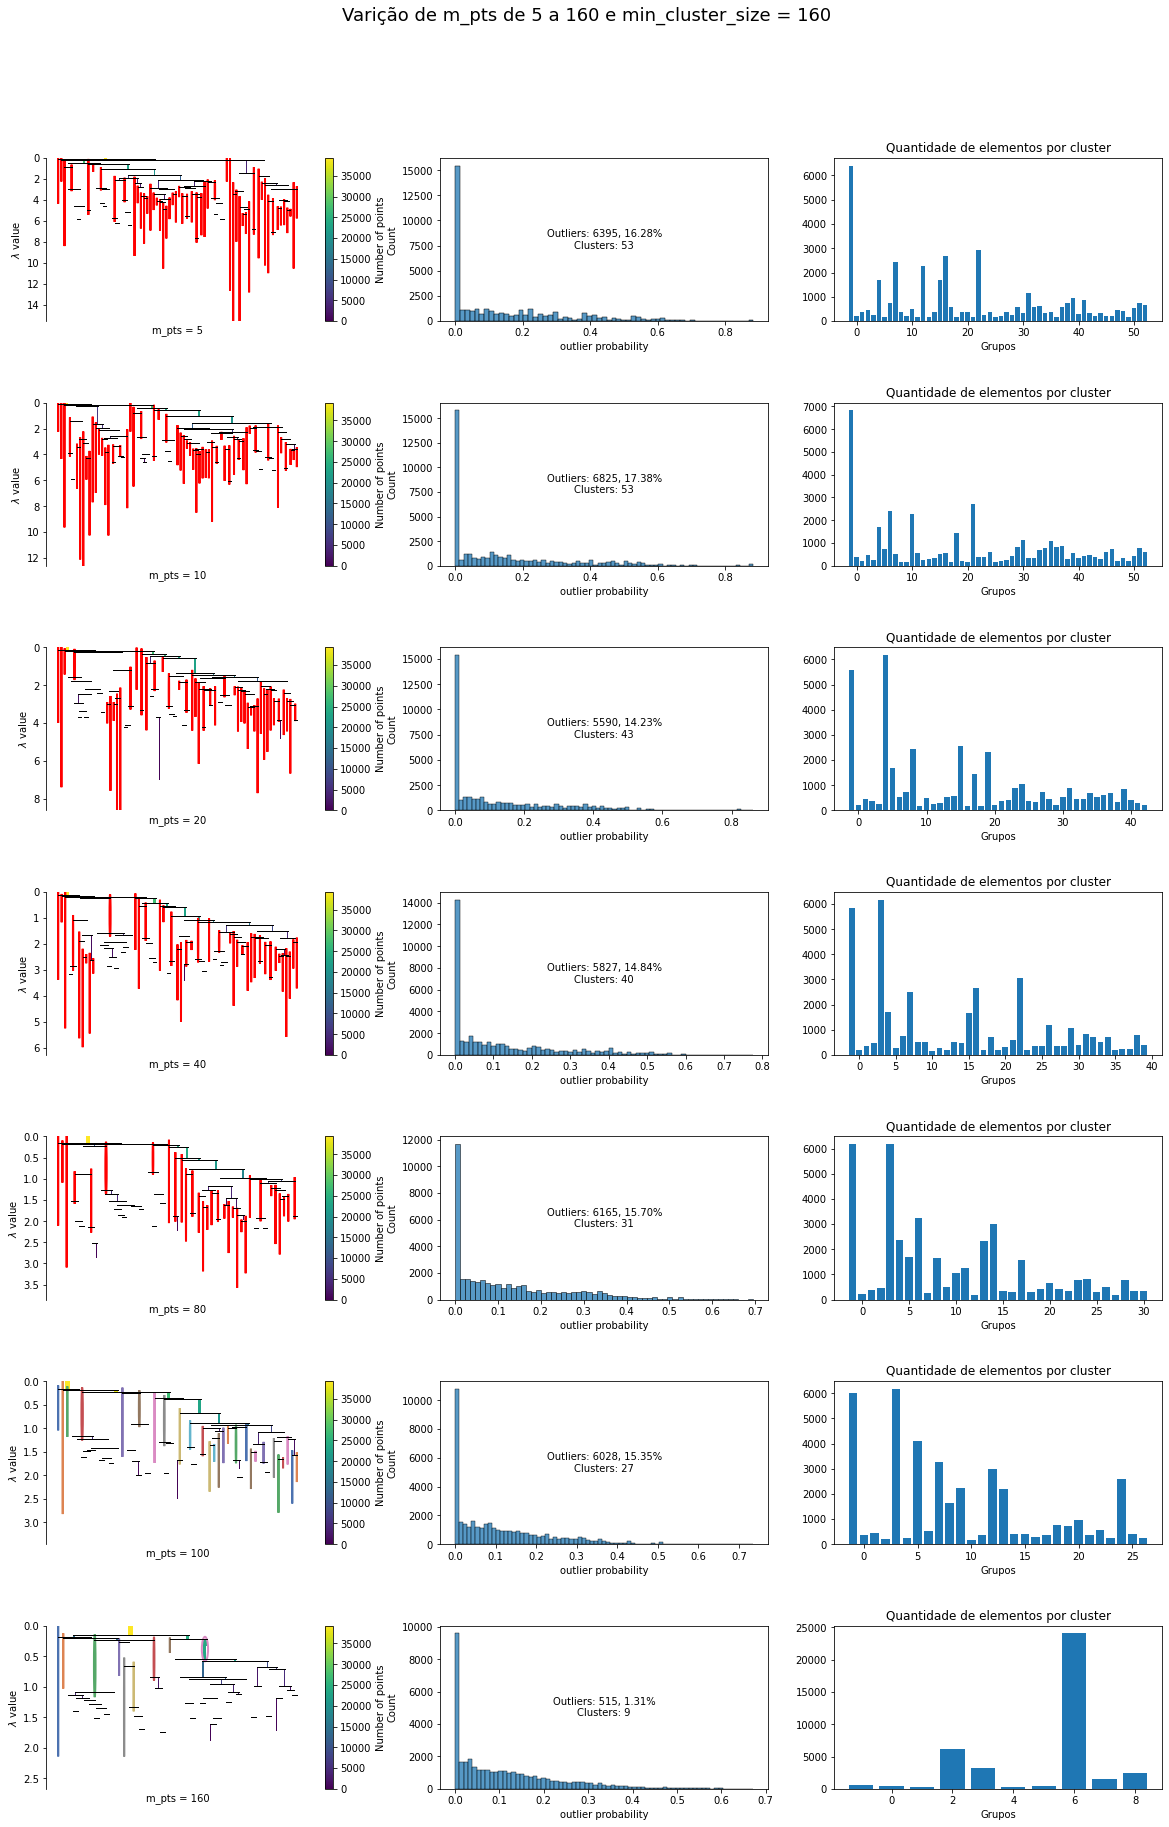

In [7]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    if i == 1:
        print(f"Fold {i}:")
        print(f" Train: index={train_index}")
        print(f" Test: index={test_index}")
        print("----------------------------------")

        print("Aplicando o MinMaxScaler nos dados")
        scaler = MinMaxScaler(copy=False)
        scaler.fit_transform(X[train_index])
        print(X[train_index])
        print("----------------------------------")

        print("Aplicando o redutor de dimensionalidade UMAP nos dados")
        reducer_umap = umap.UMAP(n_components = 10)
        dim10_umap = reducer_umap.fit_transform(X[train_index])
        print(dim10_umap.shape)
        print("----------------------------------")

        print("Aplicando o HDBSCAN nos dados")
        min_samples = 5
        min_cluster_size = 160
        cont = 1
        plt.figure(figsize=(20,30))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("Varição de m_pts de 5 a {} e min_cluster_size = {}".format(min_cluster_size,min_cluster_size), fontsize=18, y=0.95)

        while (min_samples <= min_cluster_size):
            # HDBSCAN
            cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, gen_min_span_tree=True)
            cluster.fit(dim10_umap)

            # Dendogama condensado
            ax = plt.subplot(7,3,cont)
            cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep',30))
            ax.set_xlabel("m_pts = {}".format(min_samples))
            
            # Detalhes sobre  os dados
            outliers = 0
            aux = []
            dicionario = {}
            labels = cluster.labels_
            num_dados = labels.shape[0]
            for label in labels:
                if label not in aux:
                    aux.append(label)
                    dicionario[label] = 1
                else:
                    for num in aux:
                        if num == label:
                            dicionario[label] += 1
                if label == -1:
                    outliers = outliers + 1
            sum = 0

            # Histograma de probabilidade de ser outlier
            ax = plt.subplot(7,3,cont+1)
            outlier_scores = cluster.outlier_scores_
            sns.histplot(cluster.outlier_scores_[np.isfinite(cluster.outlier_scores_)])
            ax.set_xlabel("outlier probability")
            for x, Y in dicionario.items():
                if x == -1:
                    #print("São {} pontos outliers de {} de pontos no total.\n Há {} de outliers".format(y, x, 100*y/num_dados))
                    ax.text(0.5, 0.5, 'Outliers: {}, {:.2f}%\nClusters: {}'.format(Y,100*Y/num_dados,len(aux)-1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                    sum += Y
                else:
                    #print("São {} pontos no grupo {}".format(y, x))
                    sum += Y
            
            # Histograma contendo a quantidade de elementos por cluster
            keys = list(dicionario.keys())
            keys.sort()
            dicionario_ordenado = {key: dicionario[key] for key in keys}
            keys, itens = zip(*dicionario_ordenado.items())
            ax = plt.subplot(7,3, cont+2)
            plt.bar(keys, itens)
            ax.set_title("Quantidade de elementos por cluster")
            ax.set_xlabel("Grupos")
            
            if(min_samples==80):
                min_samples = 100
            elif(min_samples==100):
                min_samples=160
            else:
                min_samples = min_samples*2
                
            cont+=3

# Análise para min_cluster_size = 140

Fold 1:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[4365 4366 4367 ... 8726 8727 8728]
----------------------------------
Aplicando o MinMaxScaler nos dados
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.32599942 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
----------------------------------
Aplicando o redutor de dimensionalidade UMAP nos dados
(39277, 10)
----------------------------------
Aplicando o HDBSCAN nos dados


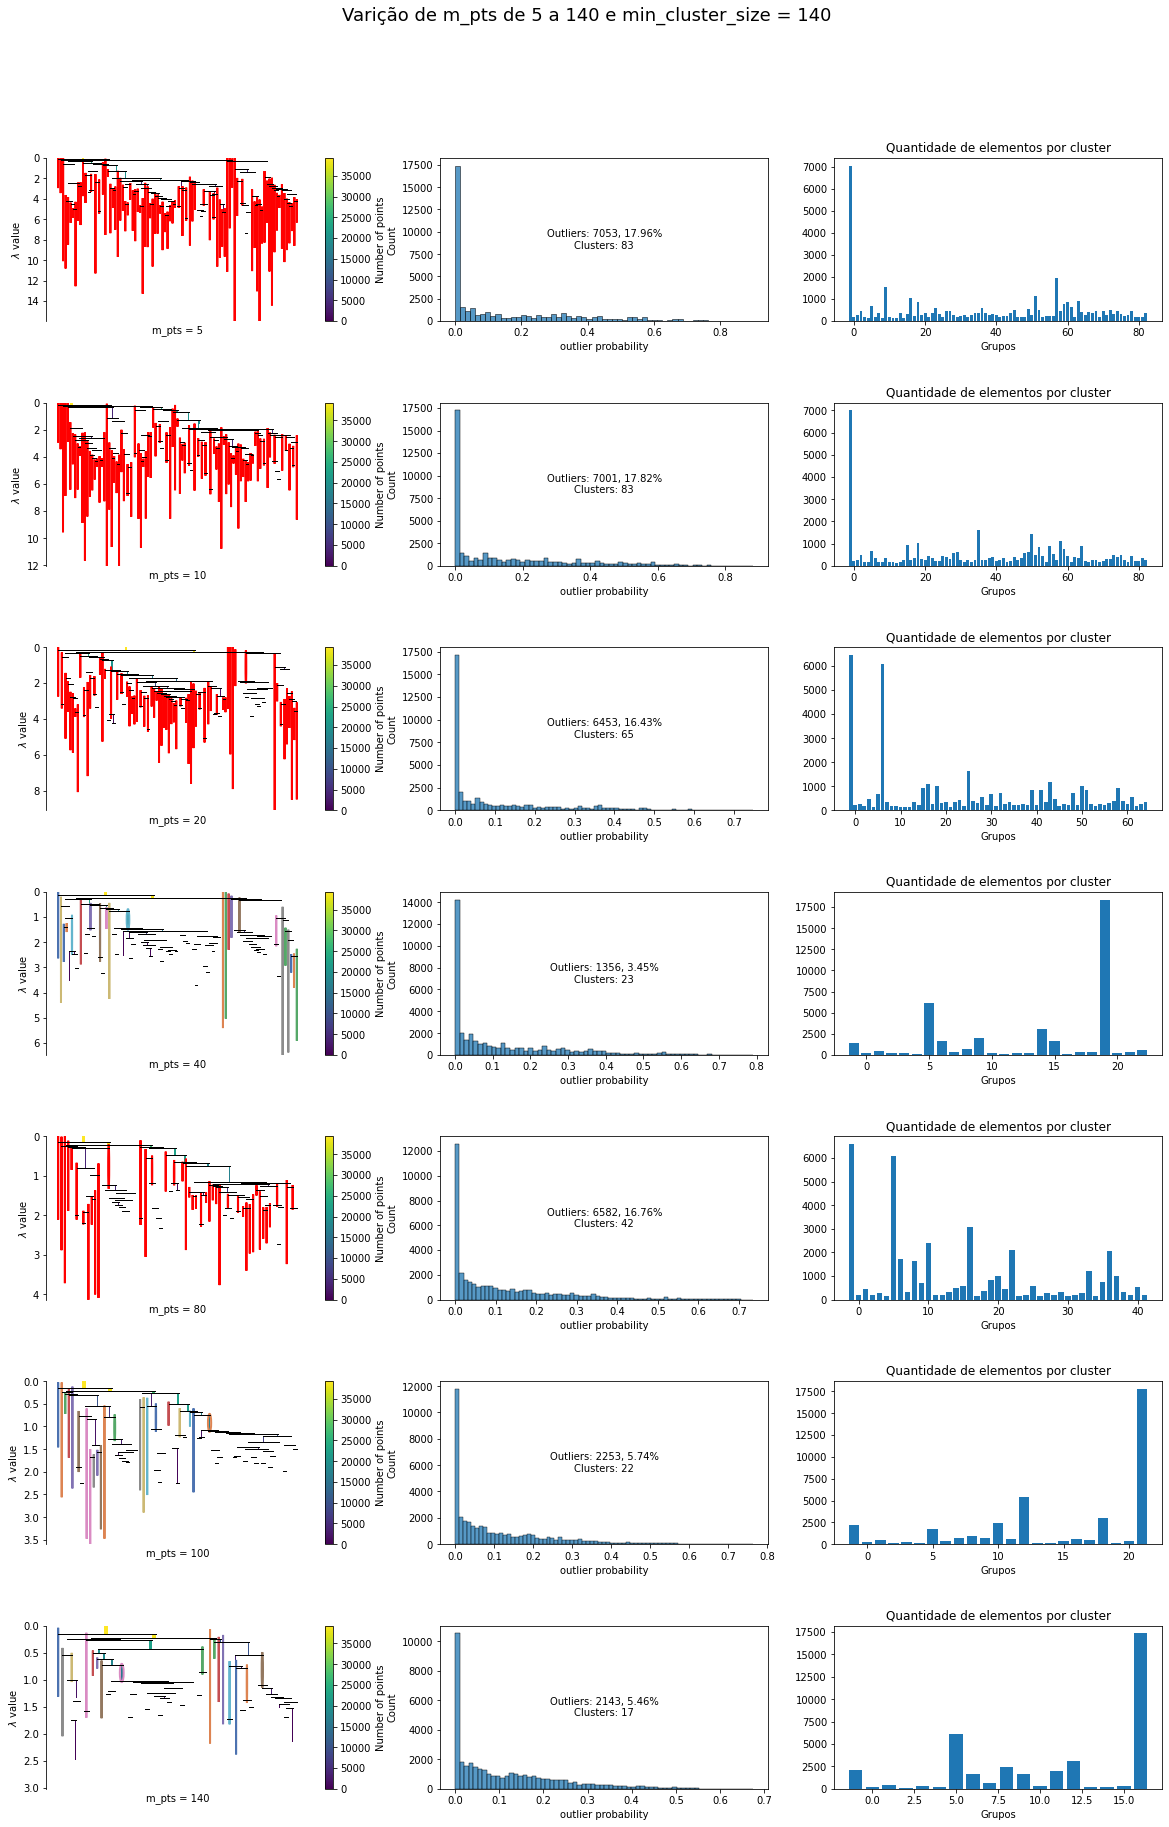

In [23]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    if i == 1:
        print(f"Fold {i}:")
        print(f" Train: index={train_index}")
        print(f" Test: index={test_index}")
        print("----------------------------------")

        print("Aplicando o MinMaxScaler nos dados")
        scaler = MinMaxScaler(copy=False)
        scaler.fit_transform(X[train_index])
        print(X[train_index])
        print("----------------------------------")

        print("Aplicando o redutor de dimensionalidade UMAP nos dados")
        reducer_umap = umap.UMAP(n_components = 10)
        dim10_umap = reducer_umap.fit_transform(X[train_index])
        print(dim10_umap.shape)
        print("----------------------------------")

        print("Aplicando o HDBSCAN nos dados")
        min_samples = 5
        min_cluster_size = 140
        cont = 1
        plt.figure(figsize=(20,30))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("Varição de m_pts de 5 a {} e min_cluster_size = {}".format(min_cluster_size,min_cluster_size), fontsize=18, y=0.95)

        while (min_samples <= min_cluster_size):
            # HDBSCAN
            cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, gen_min_span_tree=True)
            cluster.fit(dim10_umap)

            # Dendogama condensado
            ax = plt.subplot(7,3,cont)
            cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep',30))
            ax.set_xlabel("m_pts = {}".format(min_samples))
            
            # Detalhes sobre  os dados
            outliers = 0
            aux = []
            dicionario = {}
            labels = cluster.labels_
            num_dados = labels.shape[0]
            for label in labels:
                if label not in aux:
                    aux.append(label)
                    dicionario[label] = 1
                else:
                    for num in aux:
                        if num == label:
                            dicionario[label] += 1
                if label == -1:
                    outliers = outliers + 1
            sum = 0

            # Histograma de probabilidade de ser outlier
            ax = plt.subplot(7,3,cont+1)
            outlier_scores = cluster.outlier_scores_
            sns.histplot(cluster.outlier_scores_[np.isfinite(cluster.outlier_scores_)])
            ax.set_xlabel("outlier probability")
            for x, Y in dicionario.items():
                if x == -1:
                    #print("São {} pontos outliers de {} de pontos no total.\n Há {} de outliers".format(y, x, 100*y/num_dados))
                    ax.text(0.5, 0.5, 'Outliers: {}, {:.2f}%\nClusters: {}'.format(Y,100*Y/num_dados,len(aux)-1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                    sum += Y
                else:
                    #print("São {} pontos no grupo {}".format(y, x))
                    sum += Y
            
            # Histograma contendo a quantidade de elementos por cluster
            keys = list(dicionario.keys())
            keys.sort()
            dicionario_ordenado = {key: dicionario[key] for key in keys}
            keys, itens = zip(*dicionario_ordenado.items())
            ax = plt.subplot(7,3, cont+2)
            plt.bar(keys, itens)
            ax.set_title("Quantidade de elementos por cluster")
            ax.set_xlabel("Grupos")
            
            if(min_samples==80):
                min_samples = 100
            elif(min_samples==100):
                min_samples=140
            else:
                min_samples = min_samples*2
                
            cont+=3

# Escolhendo min_cluster_size=140 e min_samples=140

In [18]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    if i == 5:
        print(f"Fold {i}:")
        print(f" Train: index={train_index}")
        print(f" Test: index={test_index}")
        print("--------------------------------------------------------------------------------")

        print("Aplicando o MinMaxScaler nos dados")
        scaler = MinMaxScaler(copy=False)
        scaler.fit_transform(X)
        print(X)
        print("--------------------------------------------------------------------------------")

        print("Aplicando o redutor de dimensionalidade UMAP nos dados")
        reducer_umap = umap.UMAP(n_components = 10)
        dim10_train = reducer_umap.fit_transform(X[train_index])
        dim10_test = reducer_umap.fit_transform(X[test_index])
        print(dim10_train.shape, dim10_test.shape)
        print("-------------------------------------------")

        print("Aplicando o HDBSCAN nos dados")
        cluster = hdbscan.HDBSCAN(min_cluster_size=140, min_samples=140, prediction_data=True)
        cluster.fit(dim10_train)
        print("-------------------------------------------")

        print("Pontos por grupo")
        outliers = 0
        aux = []
        dicionario = {}
        train_labels = cluster.labels_
        num_dados = train_labels.shape[0]
        for label in train_labels:
            if label not in aux:
                aux.append(label)
                dicionario[label] = 1
            else:
                for num in aux:
                    if num == label:
                        dicionario[label] += 1
            if label == -1:
                outliers = outliers + 1

        keys = list(dicionario.keys())
        keys.sort()
        dicionario_ordenado = {key: dicionario[key] for key in keys}
        print(dicionario_ordenado)
        print("-------------------------------------------")

        print("Aplicando a predição de pontos do HDBSCAN")
        test_labels, strengths = hdbscan.approximate_predict(cluster, dim10_test)
        print(test_labels)
        print("-------------------------------------------")
        
        """
        print("Grupos de treino")
        grupos_train = []
        aux = []
        for i, label in enumerate(train_labels):
            if label not in aux:
                aux.append(label)
                dicionario[label] = 1
            else:
                for num in aux:
                    if num == label:
                        dicionario[label] += 1
            if label == -1:
                outliers = outliers + 1
        print("-------------------------------------------")

        print("Grupos de teste")
        grupos_test = []
        aux = []
        for label in test_labels:
            if label not in aux:
                aux.append(label)
                dicionario[label] = 1
            else:
                for num in aux:
                    if num == label:
                        dicionario[label] += 1
            if label == -1:
                outliers = outliers + 1
        print("-------------------------------------------")
        
        for i in

        reg = RandomForestRegressor(random_state=42)
        reg.fit(X[grupo_0_train], y[grupo_0_train])
        print(reg.score(X[grupo_0_test], y[grupo_0_test]))
        """

Fold 5:
 Train: index=[    0     1     2 ... 43638 43639 43640]
 Test: index=[21821 21822 21823 ... 26182 26183 26184]
--------------------------------------------------------------------------------
Aplicando o MinMaxScaler nos dados
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.32599942 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
--------------------------------------------------------------------------------
Aplicando o redutor de dimensionalidade UMAP nos dados
(39277, 10) (4364, 10)
-------------------------------------------
Aplicando o HDBSCAN nos dados
-------------------------------------------
Pontos por grupo
{-1: 1420, 0: 153, 1: 454, 

In [20]:
grupo_0 = []
for i, label in enumerate(train_labels):
    if label == 0:
        grupo_0.append(i)
print(grupo_0)

[653, 2729, 2744, 3313, 3314, 3315, 3316, 3372, 3373, 3374, 3375, 3439, 3440, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3626, 3627, 4778, 4779, 4780, 4781, 4782, 4783, 4784, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793, 4794, 5301, 5302, 5303, 5304, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5478, 5479, 5480, 5481, 5482, 5483, 5485, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5842, 8523, 8524, 8525, 8526, 8527, 8528, 8529, 8530, 8531, 8532, 8533, 8730, 8731, 8732, 9609, 9610, 9611, 9612, 9613, 9614, 9615, 9616, 9617, 9618, 9888, 9889, 9890, 9991, 9992, 9993, 10099, 13426, 13427, 15965, 16824, 21129, 23954, 23956, 23957, 23958, 23959, 26270, 26271, 26272, 26273, 30715, 30716, 30717, 30718, 30719, 30944, 30945, 30946, 30947, 30948, 30949, 30950, 30951, 30952, 35543, 35544, 35545, 35546, 35589, 35688, 35707, 35708, 35709, 35710, 35757, 36086, 36114, 36118, 36119, 36120, 36384, 36527, 36562, 36563, 36933, 37442, 37511, 38621]


In [60]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    if i == 5:       
        print("Pontos por grupo")
        outliers = 0
        aux = []
        dicionario = {}
        train_labels = cluster.labels_
        num_dados = train_labels.shape[0]
        for label in train_labels:
            if label not in aux:
                aux.append(label)
                dicionario[label] = 1
            else:
                for num in aux:
                    if num == label:
                        dicionario[label] += 1
            if label == -1:
                outliers = outliers + 1

        keys = list(dicionario.keys())
        keys.sort()
        dicionario_ordenado = {key: dicionario[key] for key in keys}
        print(dicionario_ordenado)

        print("Grupos de treino")
        grupos_train = []
        aux = []
        for label in train_labels:
            if label not in aux:
                aux.append(label)

        print(aux)
        n_grupos_treino = len(aux)
        print(n_grupos_treino)

        for linha in range(n_grupos_treino):
            grupo = []
            for i, label in enumerate(train_labels):
                if label == linha:
                    grupo.append(i)
                if linha == n_grupos_treino-1 and label == -1:
                    grupo.append(i)
            grupos_train.append(grupo)

        for i in range(n_grupos_treino):
            print(i)
            print(len(grupos_train[i]))

        print("-----------------------------------------------------------------------------")
        print("Pontos por grupo")
        outliers = 0
        aux = []
        dicionario = {}
        num_dados = test_labels.shape[0]
        for label in test_labels:
            if label not in aux:
                aux.append(label)
                dicionario[label] = 1
            else:
                for num in aux:
                    if num == label:
                        dicionario[label] += 1
            if label == -1:
                outliers = outliers + 1
        print("Outliers: {}".format(outliers))

        keys = list(dicionario.keys())
        keys.sort()
        dicionario_ordenado = {key: dicionario[key] for key in keys}
        print(dicionario_ordenado)

        print("Grupos de teste")
        grupos_test = []
        aux = []
        for label in test_labels:
            if label not in aux:
                aux.append(label)

        print(aux)
        n_grupos = len(aux)
        print("Número de grupos de teste: ", n_grupos)
        outliers = []

        for linha in range(n_grupos):
            grupo = []
            for i, label in enumerate(test_labels):
                if label == linha:
                    grupo.append(i)
                elif label == -1:
                    outliers.append(i)
            grupos_test.append(grupo)

        if (n_grupos-1) != 0:
            for i in range(n_grupos):
                print(i)
                print(len(grupos_test[i]),grupos_test[i])
        print(len(outliers),outliers)
        
        print("-----------------------------------------------------------------------------")
        print("Parte nova")
        scores = []
        for grupo in range(n_grupos_treino):
            print("Grupo {}".format(grupo))
            g = train_index[np.array(grupos_train[grupo])].tolist()
            t = test_index[np.array(grupos_test[n_grupos-1])].tolist()
            reg = RandomForestRegressor(random_state=42)
            reg.fit(X[g], y[g])
            score = reg.score(X[t],y[t])
            print(score)
            scores.append(score)
        print(np.array(scores).mean())  
        print("-----------------------------------------------------------------------------")

Pontos por grupo
{-1: 2143, 0: 202, 1: 463, 2: 145, 3: 263, 4: 188, 5: 6098, 6: 1615, 7: 684, 8: 2390, 9: 1617, 10: 319, 11: 2041, 12: 3114, 13: 176, 14: 146, 15: 344, 16: 17329}
Grupos de treino
[16, 7, -1, 11, 9, 5, 14, 6, 2, 8, 10, 1, 12, 3, 13, 15, 0, 4]
18
0
202
1
463
2
145
3
263
4
188
5
6098
6
1615
7
684
8
2390
9
1617
10
319
11
2041
12
3114
13
176
14
146
15
344
16
17329
17
2143
-----------------------------------------------------------------------------
Pontos por grupo
Outliers: 4364
{-1: 4364}
Grupos de teste
[-1]
Número de grupos de teste:  1
4364 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 

IndexError: arrays used as indices must be of integer (or boolean) type

In [56]:
print(np.array(scores).mean())

0.5027777275917072


In [17]:
train_labels

(39277,)

In [28]:
type(train_labels)
type(grupo_0)

list

In [46]:
n = 0
d = 0
for i in test_labels:
    if (i==0):
        d+=1
    elif i==-1:
        n+=1
print(d)
print(n)

96
4268
